## Facial Landmark Detection uning OpenCV

In [69]:
## import libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import urllib.request as urlreq
import os
from pylab import rcParams
from numpy import random
%matplotlib inline

In [70]:
## Global Variables
## Matplotlib variables
w=10
h=10
columns = 4
rows = 2

# save face detection algorithm's name as haarcascade
haarcascade = "./haar_classifier/haarcascade_frontalface_alt2.xml"
# create an instance of the Face Detection Cascade Classifier
detector = cv2.CascadeClassifier(haarcascade)

# save facial landmark detection model's name as LBFmodel
LBFmodel = "./haar_classifier/lbfmodel.yaml"

# create an instance of the Facial landmark Detector with the model
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)


In [71]:
# Load Image func - 
def loadImage(x):
    source = './data/image_'+str(x)+'.jpg'
    img = cv2.imread(source,cv2.COLOR_BGR2RGB)
    return img

In [72]:
## Face Detect Function --
 
def detectFace(image_rgb):
    # faceDetect == image_rgb
    faces = detector.detectMultiScale(image_rgb)
    for face in faces:
    #save the coordinates in x, y, w, d variables
        (x,y,w,d) = face
        faceDetect = cv2.rectangle(image_rgb,(x,y),(x+w, y+d),(0, 255, 0), 2)
    if faces == ():
        return image_rgb
    else:
        return faceDetect

In [81]:
## Face Landmark Detect Function --
 
def detectFaceLandmark(image_rgb):
    # faceDetect == image_rgb
    faces = detector.detectMultiScale(image_rgb)
    image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
    # Detect landmarks on "image_gray"
    _, landmarks = landmark_detector.fit(image_gray, faces)
    # Detect landmarks on "image_gray"
    for landmark in landmarks:
        for x,y in landmark[0]:
		# display landmarks on "image_cropped"
		# with white colour in BGR and thickness 1
            faceLandmark = cv2.circle(image_rgb, (x, y), 1, (0, 0, 255), 2)
    return faceLandmark

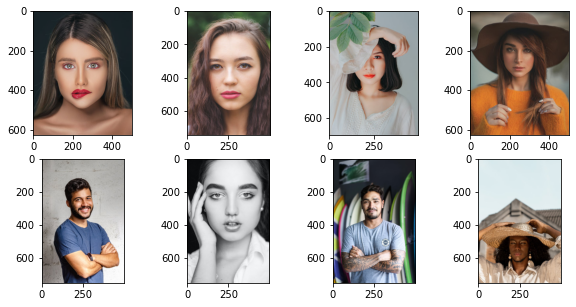

In [82]:
random.seed(100)
fig=plt.figure(figsize=(10, 5))
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    image_rgb = cv2.cvtColor(loadImage(np.random.randint(0,110)), cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
plt.show()

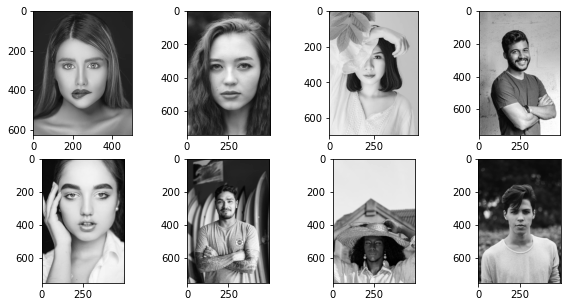

In [83]:
random.seed(100)
fig=plt.figure(figsize=(10, 5))
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    image_gray = cv2.cvtColor(loadImage(np.random.randint(0,100)), cv2.COLOR_BGR2GRAY)
    plt.imshow(image_gray,cmap='gray')
plt.show()

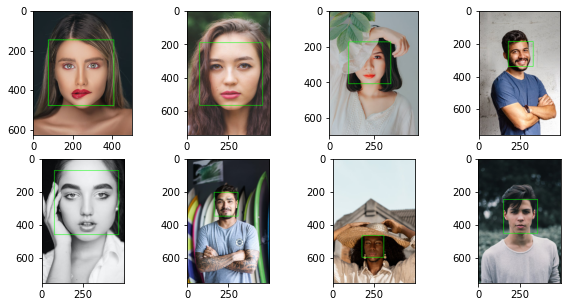

In [84]:
random.seed(100)
fig=plt.figure(figsize=(10, 5))
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    image_rgb = cv2.cvtColor(loadImage(np.random.randint(0,100)), cv2.COLOR_BGR2RGB)
    # image_face = detectFace(image_rgb)
    plt.imshow(detectFace(image_rgb))
plt.show()

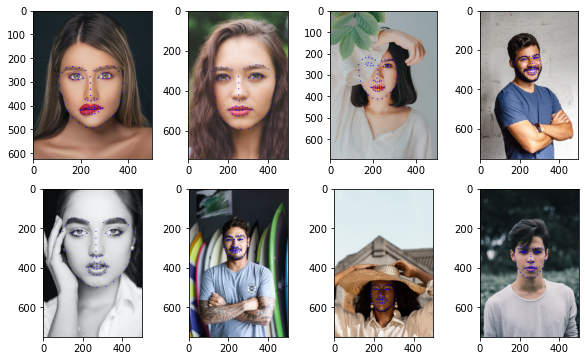

In [87]:
random.seed(100)
fig=plt.figure(figsize=(10, 6))
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    image_rgb = cv2.cvtColor(loadImage(np.random.randint(0,100)), cv2.COLOR_BGR2RGB)
    # image_face = detectFace(image_rgb)
    plt.imshow(detectFaceLandmark(image_rgb))
plt.show()